In [1]:
# Let's start with initalizing important modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
df = pd.read_csv(r'C:\Users\shrey\OneDrive\Desktop\Exposys Data Science Project\customer-segmentation-dataset\Mall_Customers - Usable.csv')

In [3]:
df

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
5             6  Female   22                  17                      76
6             7  Female   35                  18                       6
7             8  Female   23                  18                      94
8             9    Male   64                  19                       3
9            10  Female   30                  19                      72
10           11    Male   67                  19                      14
11           12  Female   35                  19                      99
12           13  Female   58                  20                      15
13           14  Female   24                  20                      77
14           15    Male   37                  20                      13
15           16    Male   22                  20                      79
16           17  Female   35                  21                      35
17           18    Male   20                  21                      66
18           19    Male   52                  23                      29
19           20  Female   35                  23                      98
20           21    Male   35                  24                      35
21           22    Male   25                  24                      73
22           23  Female   46                  25                       5
23           24    Male   31                  25                      73
24           25  Female   54                  28                      14
25           26    Male   29                  28                      82
26           27  Female   45                  28                      32
27           28    Male   35                  28                      61
28           29  Female   40                  29                      31
29           30  Female   23                  29                      87
..          ...     ...  ...                 ...                     ...
170         171    Male   40                  87                      13
171         172    Male   28                  87                      75
172         173    Male   36                  87                      10
173         174    Male   36                  87                      92
174         175  Female   52                  88                      13
175         176  Female   30                  88                      86
176         177    Male   58                  88                      15
177         178    Male   27                  88                      69
178         179    Male   59                  93                      14
179         180    Male   35                  93                      90
180         181  Female   37                  97                      32
181         182  Female   32                  97                      86
182         183    Male   46                  98                      15
183         184  Female   29                  98                      88
184         185  Female   41                  99                      39
185         186    Male   30                  99                      97
186         187  Female   54                 101                      24
187         188    Male   28                 101                      68
188         189  Female   41                 103                      17
189         190  Female   36                 103                      85
190         191  Female   34                 103                      23
191         192  Female   32                 103                      69
192         193    Male   33                 113               

In [4]:
# Converting the gender values to 1(Male) and 0(Female)
gender = {'Male': 1, 'Female':0}
df.Gender = [gender[item] for item in df.Gender]

In [5]:
df

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1       1   19                  15                      39
1             2       1   21                  15                      81
2             3       0   20                  16                       6
3             4       0   23                  16                      77
4             5       0   31                  17                      40
5             6       0   22                  17                      76
6             7       0   35                  18                       6
7             8       0   23                  18                      94
8             9       1   64                  19                       3
9            10       0   30                  19                      72
10           11       1   67                  19                      14
11           12       0   35                  19                      99
12           13       0   58                  20                      15
13           14       0   24                  20                      77
14           15       1   37                  20                      13
15           16       1   22                  20                      79
16           17       0   35                  21                      35
17           18       1   20                  21                      66
18           19       1   52                  23                      29
19           20       0   35                  23                      98
20           21       1   35                  24                      35
21           22       1   25                  24                      73
22           23       0   46                  25                       5
23           24       1   31                  25                      73
24           25       0   54                  28                      14
25           26       1   29                  28                      82
26           27       0   45                  28                      32
27           28       1   35                  28                      61
28           29       0   40                  29                      31
29           30       0   23                  29                      87
..          ...     ...  ...                 ...                     ...
170         171       1   40                  87                      13
171         172       1   28                  87                      75
172         173       1   36                  87                      10
173         174       1   36                  87                      92
174         175       0   52                  88                      13
175         176       0   30                  88                      86
176         177       1   58                  88                      15
177         178       1   27                  88                      69
178         179       1   59                  93                      14
179         180       1   35                  93                      90
180         181       0   37                  97                      32
181         182       0   32                  97                      86
182         183       1   46                  98                      15
183         184       0   29                  98                      88
184         185       0   41                  99                      39
185         186       1   30                  99                      97
186         187       0   54                 101                      24
187         188       1   28                 101                      68
188         189       0   41                 103                      17
189         190       0   36                 103                      85
190         191       0   34                 103                      23
191         192       0   32                 103                      69
192         193       1   33                 113               

In [6]:
# Filtering out the first two columns of dataset
df1 = df.iloc[:, 1:]
df1

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0         1   19                  15                      39
1         1   21                  15                      81
2         0   20                  16                       6
3         0   23                  16                      77
4         0   31                  17                      40
5         0   22                  17                      76
6         0   35                  18                       6
7         0   23                  18                      94
8         1   64                  19                       3
9         0   30                  19                      72
10        1   67                  19                      14
11        0   35                  19                      99
12        0   58                  20                      15
13        0   24                  20                      77
14        1   37                  20                      13
15        1   22                  20                      79
16        0   35                  21                      35
17        1   20                  21                      66
18        1   52                  23                      29
19        0   35                  23                      98
20        1   35                  24                      35
21        1   25                  24                      73
22        0   46                  25                       5
23        1   31                  25                      73
24        0   54                  28                      14
25        1   29                  28                      82
26        0   45                  28                      32
27        1   35                  28                      61
28        0   40                  29                      31
29        0   23                  29                      87
..      ...  ...                 ...                     ...
170       1   40                  87                      13
171       1   28                  87                      75
172       1   36                  87                      10
173       1   36                  87                      92
174       0   52                  88                      13
175       0   30                  88                      86
176       1   58                  88                      15
177       1   27                  88                      69
178       1   59                  93                      14
179       1   35                  93                      90
180       0   37                  97                      32
181       0   32                  97                      86
182       1   46                  98                      15
183       0   29                  98                      88
184       0   41                  99                      39
185       1   30                  99                      97
186       0   54                 101                      24
187       1   28                 101                      68
188       0   41                 103                      17
189       0   36                 103                      85
190       0   34                 103                      23
191       0   32                 103                      69
192       1   33                 113                       8
193       0   38                 113                      91
194       0   47                 120                      16
195       0   35                 120                      79
196       0   45                 126                      28
197       1   32                 126                      74
198       1   32                 137                      18
199       1   30                 137                      83

[200 rows x 4 columns]

In [7]:
# Describing some common math feautures of our dataframe
df1.describe()

Gender         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean     0.440000   38.850000           60.560000               50.200000
std      0.497633   13.969007           26.264721               25.823522
min      0.000000   18.000000           15.000000                1.000000
25%      0.000000   28.750000           41.500000               34.750000
50%      0.000000   36.000000           61.500000               50.000000
75%      1.000000   49.000000           78.000000               73.000000
max      1.000000   70.000000          137.000000               99.000000

In [8]:
df = df1.values
df1

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0         1   19                  15                      39
1         1   21                  15                      81
2         0   20                  16                       6
3         0   23                  16                      77
4         0   31                  17                      40
5         0   22                  17                      76
6         0   35                  18                       6
7         0   23                  18                      94
8         1   64                  19                       3
9         0   30                  19                      72
10        1   67                  19                      14
11        0   35                  19                      99
12        0   58                  20                      15
13        0   24                  20                      77
14        1   37                  20                      13
15        1   22                  20                      79
16        0   35                  21                      35
17        1   20                  21                      66
18        1   52                  23                      29
19        0   35                  23                      98
20        1   35                  24                      35
21        1   25                  24                      73
22        0   46                  25                       5
23        1   31                  25                      73
24        0   54                  28                      14
25        1   29                  28                      82
26        0   45                  28                      32
27        1   35                  28                      61
28        0   40                  29                      31
29        0   23                  29                      87
..      ...  ...                 ...                     ...
170       1   40                  87                      13
171       1   28                  87                      75
172       1   36                  87                      10
173       1   36                  87                      92
174       0   52                  88                      13
175       0   30                  88                      86
176       1   58                  88                      15
177       1   27                  88                      69
178       1   59                  93                      14
179       1   35                  93                      90
180       0   37                  97                      32
181       0   32                  97                      86
182       1   46                  98                      15
183       0   29                  98                      88
184       0   41                  99                      39
185       1   30                  99                      97
186       0   54                 101                      24
187       1   28                 101                      68
188       0   41                 103                      17
189       0   36                 103                      85
190       0   34                 103                      23
191       0   32                 103                      69
192       1   33                 113                       8
193       0   38                 113                      91
194       0   47                 120                      16
195       0   35                 120                      79
196       0   45                 126                      28
197       1   32                 126                      74
198       1   32                 137                      18
199       1   30                 137                      83

[200 rows x 4 columns]

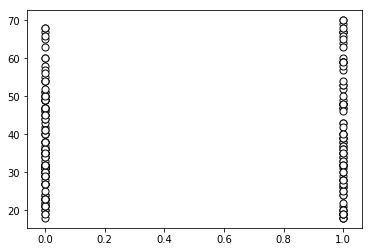

In [9]:
plt.scatter(
   df[:, 0], df[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

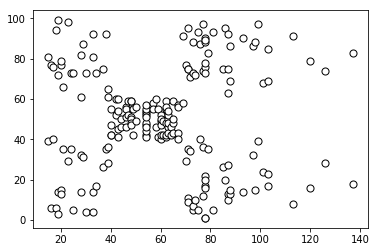

In [24]:
plt.scatter(
   df[:, 2], df[:, 3],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

In [37]:
from sklearn.cluster import KMeans
km = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

y_km = km.fit_predict(df1)

In [38]:
y_km

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [39]:
labels = pd.DataFrame(km.labels_) #This is where the label output of the KMeans we just ran lives. Make it a dataframe so we can concatenate back to the original data
labeled_data= pd.concat((df1,labels),axis=1)
labeled_data = labeled_data.rename({0:'labels'},axis=1)

In [40]:
labeled_data

Gender  Age  Annual Income (k$)  Spending Score (1-100)  labels
0         1   19                  15                      39       3
1         1   21                  15                      81       4
2         0   20                  16                       6       3
3         0   23                  16                      77       4
4         0   31                  17                      40       3
5         0   22                  17                      76       4
6         0   35                  18                       6       3
7         0   23                  18                      94       4
8         1   64                  19                       3       3
9         0   30                  19                      72       4
10        1   67                  19                      14       3
11        0   35                  19                      99       4
12        0   58                  20                      15       3
13        0   24                  20                      77       4
14        1   37                  20                      13       3
15        1   22                  20                      79       4
16        0   35                  21                      35       3
17        1   20                  21                      66       4
18        1   52                  23                      29       3
19        0   35                  23                      98       4
20        1   35                  24                      35       3
21        1   25                  24                      73       4
22        0   46                  25                       5       3
23        1   31                  25                      73       4
24        0   54                  28                      14       3
25        1   29                  28                      82       4
26        0   45                  28                      32       3
27        1   35                  28                      61       4
28        0   40                  29                      31       3
29        0   23                  29                      87       4
..      ...  ...                 ...                     ...     ...
170       1   40                  87                      13       0
171       1   28                  87                      75       1
172       1   36                  87                      10       0
173       1   36                  87                      92       1
174       0   52                  88                      13       0
175       0   30                  88                      86       1
176       1   58                  88                      15       0
177       1   27                  88                      69       1
178       1   59                  93                      14       0
179       1   35                  93                      90       1
180       0   37                  97                      32       0
181       0   32                  97                      86       1
182       1   46                  98                      15       0
183       0   29                  98                      88       1
184       0   41                  99                      39       0
185       1   30                  99                      97       1
186       0   54                 101                      24       0
187       1   28                 101                      68       1
188       0   41                 103                      17       0
189       0   36                 103                      85       1
190       0   34                 103                      23       0
191       0   32                 103                      69       1
192       1   33                 113                       8       0
193       0   38                 113                      91       1
194       0   47                 120                      16       0
195       0   35                 120                      79       1
196

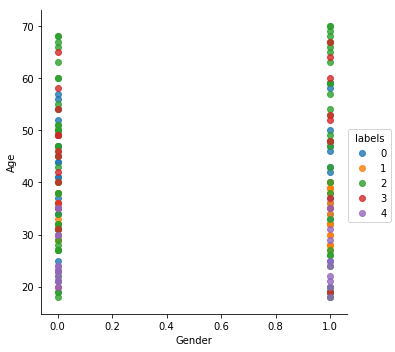

In [41]:
import seaborn as sns
sns.lmplot(x='Gender',y='Age',data=labeled_data,hue='labels',fit_reg=False)

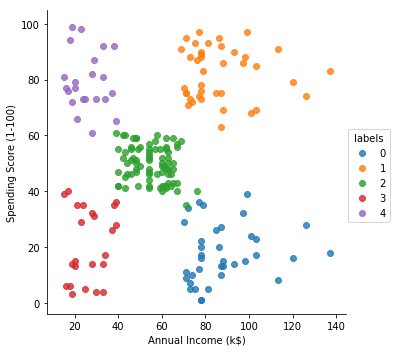

In [42]:
import seaborn as sns
sns.lmplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=labeled_data,hue='labels',fit_reg=False)

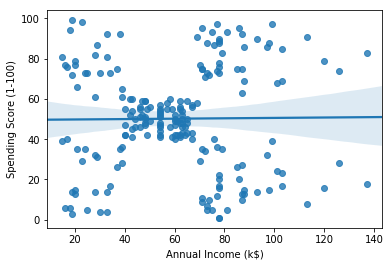

In [43]:
sns.regplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=labeled_data)

In [44]:
clusters = {0:list(),1:list(),2:list(),3:list(),4:list()}
for i in range(len(labeled_data)):
    clusters[labeled_data.iloc[i,4]].append([labeled_data.iloc[i,0],labeled_data.iloc[i,1],labeled_data.iloc[i,2],labeled_data.iloc[i,3], labeled_data.iloc[i,4]])
print(clusters)
clusters_df = pd.DataFrame(list(clusters.items()), columns = ['Cluster','Values'])
clusters_df

{0: [[0, 23, 70, 29, 0], [1, 59, 71, 11, 0], [1, 47, 71, 9, 0], [0, 25, 72, 34, 0], [1, 20, 73, 5, 0], [0, 44, 73, 7, 0], [1, 19, 74, 10, 0], [0, 57, 75, 5, 0], [1, 25, 77, 12, 0], [1, 48, 77, 36, 0], [0, 34, 78, 22, 0], [1, 43, 78, 17, 0], [0, 44, 78, 20, 0], [0, 47, 78, 16, 0], [1, 37, 78, 1, 0], [1, 34, 78, 1, 0], [0, 56, 79, 35, 0], [1, 19, 81, 5, 0], [1, 50, 85, 26, 0], [1, 42, 86, 20, 0], [0, 36, 87, 27, 0], [1, 40, 87, 13, 0], [1, 36, 87, 10, 0], [0, 52, 88, 13, 0], [1, 58, 88, 15, 0], [1, 59, 93, 14, 0], [0, 37, 97, 32, 0], [1, 46, 98, 15, 0], [0, 41, 99, 39, 0], [0, 54, 101, 24, 0], [0, 41, 103, 17, 0], [0, 34, 103, 23, 0], [1, 33, 113, 8, 0], [0, 47, 120, 16, 0], [0, 45, 126, 28, 0], [1, 32, 137, 18, 0]], 1: [[1, 39, 69, 91, 1], [0, 31, 70, 77, 1], [1, 40, 71, 95, 1], [1, 38, 71, 75, 1], [1, 39, 71, 75, 1], [0, 31, 72, 71, 1], [0, 29, 73, 88, 1], [1, 32, 73, 73, 1], [0, 35, 74, 72, 1], [1, 32, 75, 93, 1], [0, 32, 76, 87, 1], [1, 28, 77, 97, 1], [0, 32, 77, 74, 1], [1, 34, 78,

Cluster                                             Values
0        0  [[0, 23, 70, 29, 0], [1, 59, 71, 11, 0], [1, 4...
1        1  [[1, 39, 69, 91, 1], [0, 31, 70, 77, 1], [1, 4...
2        2  [[0, 31, 39, 61, 2], [0, 50, 40, 55, 2], [0, 2...
3        3  [[1, 19, 15, 39, 3], [0, 20, 16, 6, 3], [0, 31...
4        4  [[1, 21, 15, 81, 4], [0, 23, 16, 77, 4], [0, 2...

In [45]:
# Checking Inertia and Distortion
from scipy.spatial.distance import cdist
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(df1) 
    kmeanModel.fit(df1)     
      
    distortions.append(sum(np.min(cdist(df1, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / df1.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(df1, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / df1.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

1 : 35.58782757352547
2 : 30.122051138558877
3 : 24.020507648685765
4 : 20.47612410788973
5 : 17.777728493737182
6 : 15.448663692811202
7 : 14.562860114893999
8 : 13.850513224645463
9 : 13.366870428173147


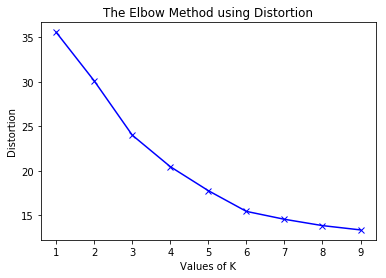

In [46]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

1 : 308862.06
2 : 212889.44245524297
3 : 143391.59236035682
4 : 104414.67534220166
5 : 75528.58656469136
6 : 58348.64136331505
7 : 51167.19736842105
8 : 44359.634641148325
9 : 41102.37791958042


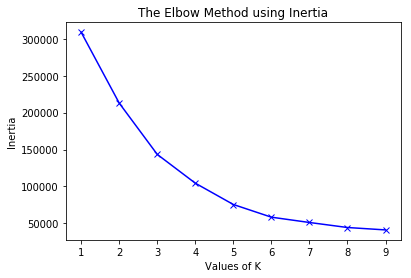

In [47]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 

plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

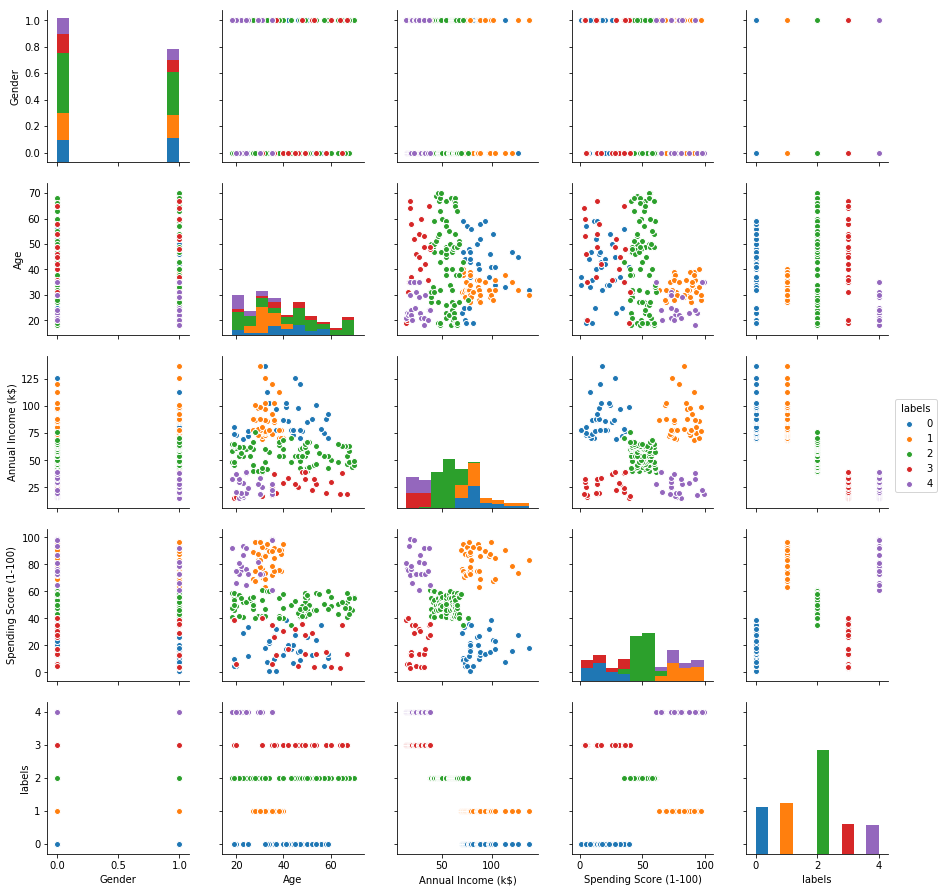

In [48]:
sns.pairplot(labeled_data,hue='labels')